
## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

Saved figure as /mnt/c/users/micha/downloads/RaXPol_2015-06-26T05:00:58Z.png


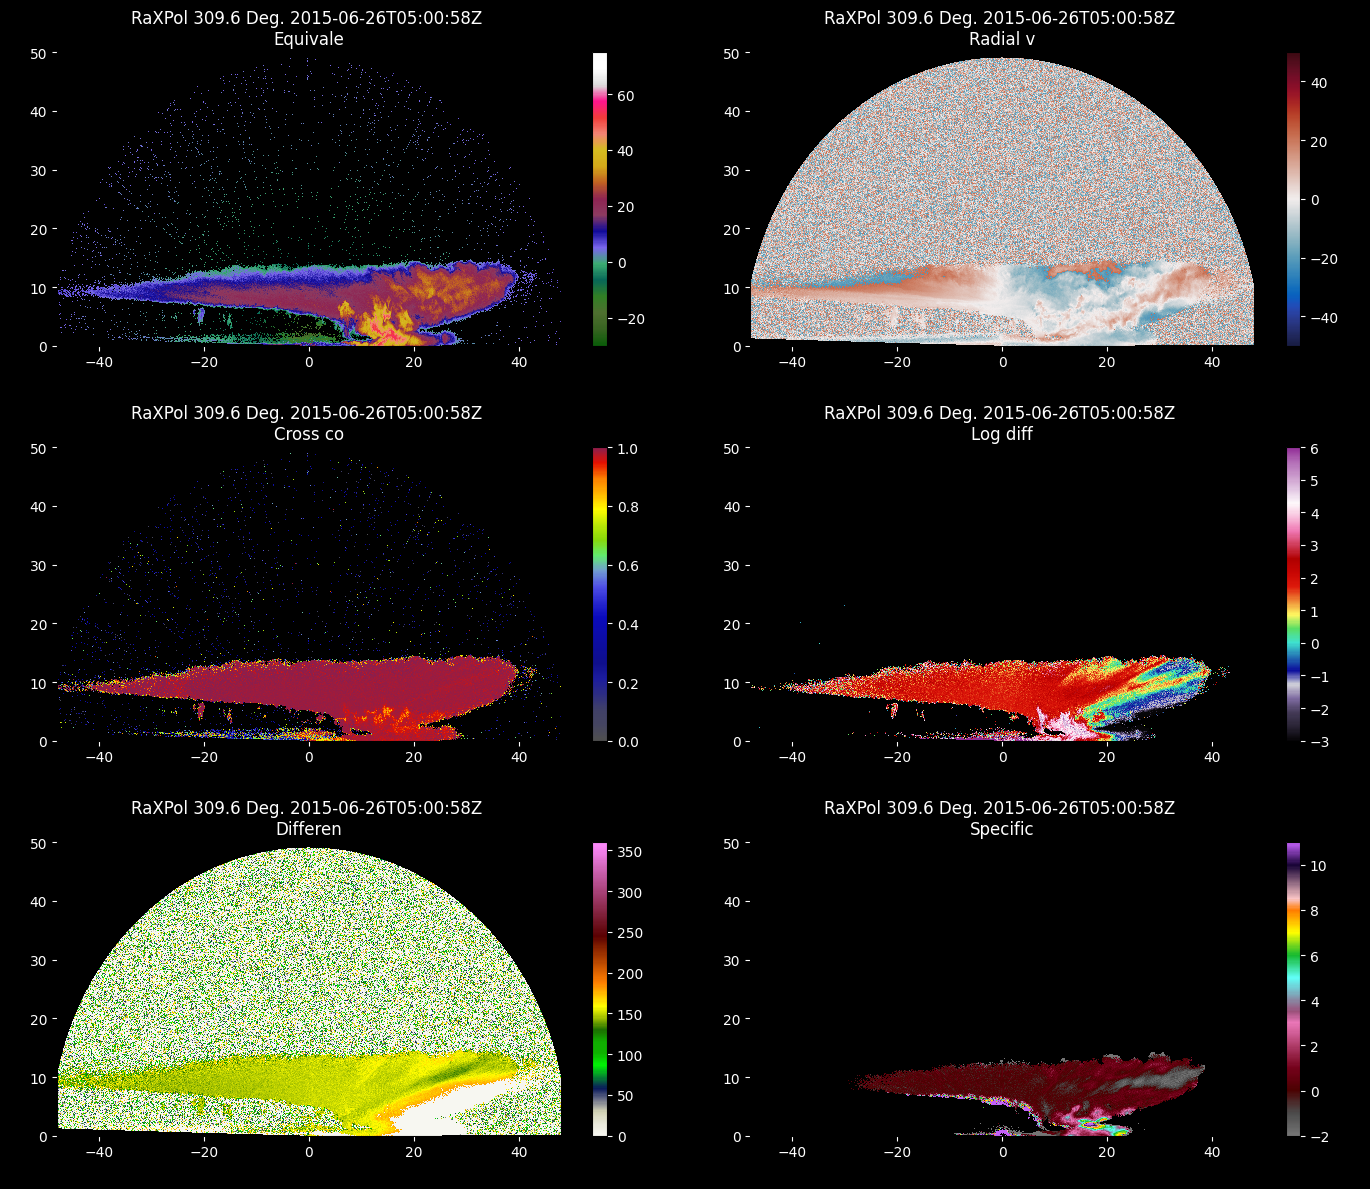

In [1]:
import os
import pyart
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Plot settings
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['text.color'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams["figure.figsize"] = (12, 8)

def create_custom_cmap(hex_colors):
    rgb_colors = [mcolors.hex2color(hex_code) for hex_code in hex_colors]
    return mcolors.LinearSegmentedColormap.from_list("custom_cmap", rgb_colors[::-1])

# custom colormaps
zdr_cmap = create_custom_cmap(['#922E97', '#B26CB6', '#C998CB', '#E2C7E3', '#FEF9FB', '#F8BEDB', '#EF77B2', '#CF3B58', '#B00000', '#C80603', '#DE1A0B', '#EE8836', '#FEF861', '#5ADE64', '#3FE2CF', '#2474B4', '#0B0D9C', '#D1D1D9', '#7F6CA2', '#453B58', '#292335', '#060507'])
cc_cmap = create_custom_cmap(['#8B1E4D', '#E41000', '#FC7F00', '#FFB600', '#FFFB00', '#BCE906', '#87D70B', '#61ED6E', '#719CD2', '#5151E8', '#2929D1', '#0A0ABD', '#0C0CAC', '#0D0D9C', '#0F0F8C', '#1C1C9E', '#2D2D84', '#404068', '#454561', '#4F4F4F'])
kdp_cmap = create_custom_cmap(['#C361F9', '#6F329A', '#160234', '#624264', '#B18596', '#FAC4C5', '#FF7B00', '#FFBC00', '#FEFF00', '#84DA1A', '#16BA31', '#3ADB94', '#60FEF6', '#74C7D1', '#8987A2', '#9B507A', '#EA77B8', '#CE5B93', '#B03D6A', '#921F42', '#75021B', '#62000E', '#4B0101', '#4B2828', '#4B4A4A', '#5F5F5F', '#757575'])
sw_cmap = create_custom_cmap(['#02A0C8', '#2CA7C6', '#53AEC5', '#78B4C3', '#9FBBC1', '#C1C1C1', '#DCDCDC', '#E6E6E6', '#F2F2F2', '#FFFD01', '#FDC60F', '#FDB313', '#FC991A', '#F7742D', '#EF6341', '#E54F5B', '#DE406D', '#B73192', '#7D26BD', '#31148A', '#1A0855'])
hawkeye_cmap = create_custom_cmap(['#FEFEFE', '#FFFFFF', '#DCDCDC', '#FD158B', '#F13C3A', '#F48474', '#D5BC20', '#D4A919', '#C16022', '#8E2453', '#8D3B60', '#0F0A99', '#7A65EC', '#3CAC71', '#076658', '#318025', '#4E6F2F', '#386421', '#0B5C09'])
phi_cmap = create_custom_cmap(['#FE8BFE', '#ED7CE3', '#D569BE',  '#C0579E',  '#AB457D',  '#98345F',  '#83233F',  '#6D111E',  '#5A0001',  '#882300',  '#B04100',  '#DA6100',  '#FF7F00',  '#FFBF00',  '#FFFE00',  '#9EBC00',  '#1C6E00',  '#10AE00',  '#0FB100',  '#00F404',  '#058730',  '#0A1A5C',  '#71758A',  '#D2D2B5',  '#E9E9DA', '#F7F7F1'])



# Settings
input_folder = "/mnt/c/users/micha/downloads/cfrad/" # cfrad.20150626_050058.000_to_20150626_050117.000_RaXPol_RHI.nc
layout_option = "six"

x_min_distance = -48
x_max_distance = 48
y_max_height = 50

# file functions
def load_radar_files(folder):
    files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(".nc")]
    files.sort()
    return files

def extract_datetime(radar):
    return radar.time['units'].split('since')[-1].strip()

def extract_radar_name(radar):
    return radar.metadata.get('instrument_name', 'Unknown Radar')

def extract_azimuth(radar, sweep_index):
    return radar.azimuth['data'][sweep_index]

def plot_rhi_single(radar, ax, title):
    display = pyart.graph.RadarDisplay(radar)
    ax.clear()
    display.plot_rhi(field="DBZ", sweep=0, ax=ax, colorbar_label=r'$Z_H$ (dBZ)', 
                     cmap=hawkeye_cmap, vmin=-8, vmax=50)
    ax.set_xlim(x_min_distance, x_max_distance)
    ax.set_ylim(0, y_max_height)
    ax.set_title(title, fontsize=12)

def plot_rhi_double_panel(radar, axs, title):
    display = pyart.graph.RadarDisplay(radar)
    fields = [
        ("DBZ", r'$Z_H$ (dBZ)', -30, 21, hawkeye_cmap),
        ("VEL", r'$V$ (m/s)', 0, 5, 'balance')
    ]
    for ax, (field, label, vmin, vmax, cmap) in zip(axs.flatten(), fields):
        ax.clear()
        display.plot_rhi(field=field, sweep=0, ax=ax, colorbar_label=label, cmap=cmap, vmin=vmin, vmax=vmax)
        ax.set_xlim(x_min_distance, x_max_distance)
        ax.set_ylim(0, y_max_height)

def plot_rhi_multipanel(radar, axs, title, num_panels):
    display = pyart.graph.RadarDisplay(radar)
    fields = [
        ("DBZ", r'$Z_H$ (dBZ)', -30, 75, hawkeye_cmap),
        ("VEL", r'$V$ (m/s)', -50, 50, 'balance'),
        ("RHOHV", r'$\rho_{HV}$', 0, 1.0, cc_cmap),     
        ("ZDR", r'$Z_{DR}$ (dB)', -3, 6, zdr_cmap),
        ("PHIDP", r'$\phi_{dp}$', 0, 360, phi_cmap),
        ("KDP", r'$K_{DP}$ (deg/km)', -2, 11, kdp_cmap)
    ]
    for ax, (field, label, vmin, vmax, cmap) in zip(axs.flatten(), fields[:num_panels]):
        ax.clear()
        display.plot_rhi(field=field, sweep=0, ax=ax, colorbar_label=label, cmap=cmap, vmin=vmin, vmax=vmax)
        ax.set_xlim(x_min_distance, x_max_distance)
        ax.set_ylim(0, y_max_height)

# Load radar files
radar_files = load_radar_files(input_folder)
if not radar_files:
    print("No radar files found in the specified folder.")
    exit()

radar = pyart.io.read(radar_files[0])

datetime_str = extract_datetime(radar)
radar_name = extract_radar_name(radar)
azimuth = extract_azimuth(radar, 0)
title = f"{radar_name} - RHI Scan - {datetime_str} - Azimuth: {azimuth:.2f}°"

# Plotting
if layout_option == "single":
    fig, ax = plt.subplots(figsize=(10, 6))
    plot_rhi_single(radar, ax, title)
elif layout_option == "double":
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    plot_rhi_double_panel(radar, axs, title)
else:
    num_panels = 6 if layout_option == "six" else 4
    fig, axs = plt.subplots(3, 2 if layout_option == "six" else 2, figsize=(14, 12) if layout_option == "six" else (12, 10))
    plot_rhi_multipanel(radar, axs, title, num_panels)

output_folder = "/mnt/c/users/micha/downloads"

# saving the figure
output_filename = os.path.join(output_folder, f"{radar_name}_{datetime_str}.png")
plt.tight_layout()
plt.savefig(output_filename, dpi=2000, facecolor=fig.get_facecolor())
print(f"Saved figure as {output_filename}")